## Working with EEG data
We learned how to load basic information about CML experiments and experimental events. Next, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sourced from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations tomorrow. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data

In [24]:
import pandas as pd
import cmlreaders as cml

# We load the dataframe for all sessions.
df = cml.get_data_index()

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
# Pick the first session
df_sess = df_select.iloc[0]

# Initialize data reader using session metadata
reader = cml.CMLReader(subject=df_sess['subject'], experiment=df_sess['experiment'], session=df_sess['session'],
                       localization=df_sess['localization'], montage=df_sess['montage'])

# For first session...
evs = reader.load("events")
word_evs = evs[evs['type']=='WORD']

#### Load subject electrodes

In [25]:
channels = reader.load("pairs")  #loading all bipolar pairs, but can use 'contacts' instead for non-rereferenced data
channels[:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space. 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

**Exercise: Plot the distributions of 'ind' x, y, and z values for all of R1111Ms electrodes.**

**Exercise: How many electrodes does R1111M have placed in the temporal cortex? How many on the left and how many on the right?**

### Load EEG

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the newer RAM ENS system. The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [26]:
reader.load_eeg?

Signature: reader.load_eeg(events: Union[pandas.core.frame.DataFrame, NoneType] = None, rel_start: int = None, rel_stop: int = None, scheme: Union[pandas.core.frame.DataFrame, NoneType] = None, clean: Union[bool, NoneType] = False)
Docstring:
Load EEG data.

Parameters
----------
events
    Events to load EEG epochs from. Incompatible with passing
    ``epochs``.
rel_start
    Start time in ms relative to passed event onsets. This parameter is
    required when passing events and not used otherwise.
rel_stop
    Stop time in ms relative to passed event onsets. This  parameter is
    required when passing events and not used otherwise.
scheme
    When specified, a bipolar scheme to rereference the data with
    and/or filter by channel. Rereferencing is only possible if the
    data were recorded in monopolar (a.k.a. common reference) mode.
    (Currently available for iEEG only.)
clean
    If True, load re-referenced, filtered, and ICA/LCF-cleaned version
    of data (currently availab

In [27]:
# Grab the EEG data
eeg_container = reader.load_eeg(events=evs, rel_start=0, rel_stop=1600, scheme=channels)
eeg = eeg_container.data
samplingrate = eeg_container.samplerate

In [28]:
# The output from this mode is a numpy array of [events, electrodes, samples]
print(eeg.shape)

# Show the EEG data
print(eeg)


(764, 141, 800)
[[[  6153   6163   6173 ...   6080   6074   6067]
  [  7068   7064   7064 ...   7143   7134   7127]
  [ -4876  -4871  -4869 ...  -5025  -5020  -5012]
  ...
  [  7825   7827   7828 ...   7780   7780   7776]
  [-10137 -10133 -10133 ... -10249 -10249 -10246]
  [ -1432  -1435  -1437 ...  -1436  -1432  -1428]]

 [[  6172   6178   6180 ...   6037   6038   6032]
  [  7071   7089   7095 ...   6892   6887   6877]
  [ -4948  -4964  -4969 ...  -4818  -4809  -4797]
  ...
  [  7734   7732   7728 ...   7763   7763   7767]
  [-10265 -10265 -10265 ... -10234 -10233 -10233]
  [ -1429  -1429  -1433 ...  -1394  -1389  -1388]]

 [[  5855   5860   5871 ...   6159   6153   6153]
  [  7030   7031   7037 ...   7151   7145   7137]
  [ -4958  -4961  -4958 ...  -4958  -4958  -4957]
  ...
  [  7693   7699   7712 ...   7770   7769   7773]
  [-10164 -10166 -10170 ... -10205 -10210 -10221]
  [ -1413  -1416  -1419 ...  -1454  -1453  -1448]]

 ...

 [[  6131   6119   6109 ...   6194   6200   6192]
  [ 

In [29]:
# We can immediately filter by word events and channels,
# here selecting channels 0 through 4 (up to but not including the 5):

eeg_filt = eeg[word_evs.index, 0:5]

print(eeg_filt.shape)
print(eeg_filt)

(288, 5, 800)
[[[ 6193  6194  6202 ...  6306  6299  6296]
  [ 7132  7128  7120 ...  7166  7170  7174]
  [-4988 -4987 -4989 ... -4948 -4952 -4967]
  [ 3814  3817  3821 ...  3903  3889  3878]
  [-2088 -2088 -2087 ... -2487 -2492 -2495]]

 [[ 6255  6251  6257 ...  5965  5959  5950]
  [ 7177  7165  7165 ...  7013  7015  7018]
  [-4963 -4962 -4965 ... -5019 -5025 -5034]
  [ 3777  3777  3769 ...  3860  3855  3856]
  [-2045 -2045 -2053 ... -2205 -2209 -2215]]

 [[ 6011  5995  5983 ...  6338  6340  6344]
  [ 7025  7006  6993 ...  7096  7113  7135]
  [-4905 -4902 -4904 ... -4886 -4888 -4895]
  [ 3784  3785  3782 ...  3760  3762  3758]
  [-2196 -2199 -2206 ... -2086 -2109 -2124]]

 ...

 [[ 6658  6642  6631 ...  6269  6256  6248]
  [ 7302  7287  7286 ...  7322  7308  7300]
  [-4897 -4886 -4887 ... -4828 -4818 -4809]
  [ 3821  3825  3820 ...  4056  4055  4050]
  [-2071 -2079 -2089 ... -2571 -2564 -2559]]

 [[ 6055  6047  6042 ...  6104  6095  6084]
  [ 7137  7136  7139 ...  6991  6982  6979]
  [-

In [30]:
# You might instead want the EEG in a PTSA or MNE format.
# These two libraries will be very useful for later analyses.
eeg_ptsa = eeg_container.to_ptsa()
eeg_mne = eeg_container.to_mne()

Not setting metadata
Not setting metadata
764 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [31]:
# We can select out word events and the first five channels using PTSA, just like the numpy array
eeg_ptsa_filt = eeg_ptsa[word_evs.index, channels.index[0:5]]

# Lets look at the resulting data
print(eeg_ptsa_filt)

<xarray.TimeSeries (event: 288, channel: 5, time: 800)>
array([[[ 6193,  6194,  6202, ...,  6306,  6299,  6296],
        [ 7132,  7128,  7120, ...,  7166,  7170,  7174],
        [-4988, -4987, -4989, ..., -4948, -4952, -4967],
        [ 3814,  3817,  3821, ...,  3903,  3889,  3878],
        [-2088, -2088, -2087, ..., -2487, -2492, -2495]],

       [[ 6255,  6251,  6257, ...,  5965,  5959,  5950],
        [ 7177,  7165,  7165, ...,  7013,  7015,  7018],
        [-4963, -4962, -4965, ..., -5019, -5025, -5034],
        [ 3777,  3777,  3769, ...,  3860,  3855,  3856],
        [-2045, -2045, -2053, ..., -2205, -2209, -2215]],

       [[ 6011,  5995,  5983, ...,  6338,  6340,  6344],
        [ 7025,  7006,  6993, ...,  7096,  7113,  7135],
        [-4905, -4902, -4904, ..., -4886, -4888, -4895],
        [ 3784,  3785,  3782, ...,  3760,  3762,  3758],
        [-2196, -2199, -2206, ..., -2086, -2109, -2124]],

       ...,

       [[ 6658,  6642,  6631, ...,  6269,  6256,  6248],
        [ 730

In [32]:
# We can also filter the eeg_mne for word events.
eeg_mne_filt = eeg_mne[word_evs.index]

# Then we can filter the eeg_mne_filt again for channels.
eeg_mne_filt = eeg_mne_filt.pick_channels(eeg_mne.ch_names[0:5])

# Lets observe the remaining dimensions
print(eeg_mne_filt.get_data().shape)

# And look at the numpy array of the remaining data
print(eeg_mne_filt.get_data())


(288, 5, 800)
[[[ 6193.  6194.  6202. ...  6306.  6299.  6296.]
  [ 7132.  7128.  7120. ...  7166.  7170.  7174.]
  [-4988. -4987. -4989. ... -4948. -4952. -4967.]
  [ 3814.  3817.  3821. ...  3903.  3889.  3878.]
  [-2088. -2088. -2087. ... -2487. -2492. -2495.]]

 [[ 6255.  6251.  6257. ...  5965.  5959.  5950.]
  [ 7177.  7165.  7165. ...  7013.  7015.  7018.]
  [-4963. -4962. -4965. ... -5019. -5025. -5034.]
  [ 3777.  3777.  3769. ...  3860.  3855.  3856.]
  [-2045. -2045. -2053. ... -2205. -2209. -2215.]]

 [[ 6011.  5995.  5983. ...  6338.  6340.  6344.]
  [ 7025.  7006.  6993. ...  7096.  7113.  7135.]
  [-4905. -4902. -4904. ... -4886. -4888. -4895.]
  [ 3784.  3785.  3782. ...  3760.  3762.  3758.]
  [-2196. -2199. -2206. ... -2086. -2109. -2124.]]

 ...

 [[ 6658.  6642.  6631. ...  6269.  6256.  6248.]
  [ 7302.  7287.  7286. ...  7322.  7308.  7300.]
  [-4897. -4886. -4887. ... -4828. -4818. -4809.]
  [ 3821.  3825.  3820. ...  4056.  4055.  4050.]
  [-2071. -2079. -2089. 

Text(0.5, 1.0, 'Sample EEG trace')

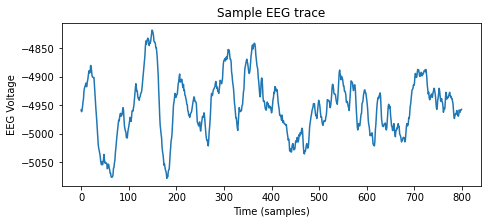

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot an example EEG trace
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of all of the analyses you'll do in the lab -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered tomorrow.

### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

<center>
<img src="http://www.bem.fi/book/13/fi/1303.gif">
</center>

In [34]:
# Let's examine the bipolar referencing used in the example data.
# The channels are as follows:
channels = reader.load("pairs")

channels[0:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Compare contact_1, contact_2, and the dash separated pairs in the label column.  The bipolar referencing scheme works by subtracting contact_1 from contact_2, and recording that signal in the EEG file.  The brain regions and coordinates identified in the various columns are typically taken from the location in between the two electrodes which make up the bipolar pair.

## Check out some ERPs
To carry out an ERP analysis on the voltage data, we must 1. Load the desired events, 2. Filter to only encoding
events, 3. Get the voltage for all encoding events, 4. Z-Score the voltage, 5. Get a logical index of recall status, 6. Plot
the average subsequently recalled and subsequently forgotten voltage traces.

avg.region: cuneus


Text(0, 0.5, 'Z-scored Voltage')

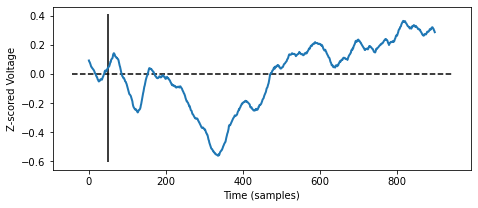

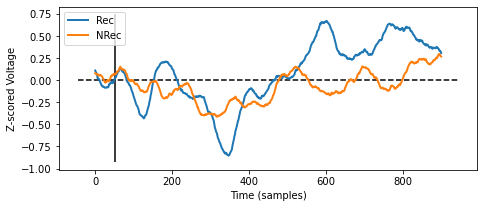

In [35]:
import numpy as np

# Load 1700ms long EEG events from 100ms before event to 1600ms after
eeg_container = reader.load_eeg(evs, -100, 1600, scheme=channels)
eeg = eeg_container.data
sr = eeg_container.samplerate

# Select word encoding events for channel 112 (as a slice), keeping events, channels, time
# Channel 112 is in the cuneus, part of the occipital lobe.
eeg = eeg[word_evs.index, 112:113]
print('avg.region:', channels.iloc[112]['avg.region'])

# Get recalled/not recalled status
# Note, the values are 0 and 1 in the database.  It is essential to turn this into a boolean array
# so that numpy will later process it as a boolean mask, and not as indices of 0 and 1 to repeatedly
# index the eeg with.
rec_status = word_evs['recalled']==True

mu = np.mean(np.mean(eeg[:, 0, :], 1), 0)
std_ = np.std(np.mean(eeg[:, 0, :], 1), 0)

zeeg = (eeg-mu)/std_

# Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

# Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

**Exercise: Plot the ERP in a 2-second span surrounding the recall of each word event for a lateral occipital electrode from the first FR1 session conducted by R1383J. Does our occipital electrode show an effect? What about elsewhere in the brain?**

<span style='color:blue'> *The remainder of this notebook is a brief overview of some univariate statistical concepts and examples that will be useful in Assignment 3 and beyond. Feel free to skip it and begin Assignment 3 if you are already familiar.* </span>

### T-tests

Brief aside on t-tests and how to use them.

For more information, see: https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions

### Multiple Comparisons in Statistical Tests

While our goal with this course is not to teach you statistics, we do need to take a slight detour to address some common statistical issues that come up in ECoG analyses. First, we'll touch on the problem of **multiple comparisons** ( https://en.wikipedia.org/wiki/Multiple_comparisons_problem ). This refers to the idea that, if you run many statistical tests, you're more likely to get a false positive with increasing numbers of tests. For example, if a subject has 100 electrodes, and we'd like to test whether there's an increase in power at each electrode, some will -- purely by chance -- show an increase in power even if it's not meaningfully correlated with memory. 

The easiest way to correct for multiple comparisons is to set a more stringent threshold for determining significance. Typically, these thresholds are set as <i>p</i> values, which you're likely quite familiar with. The <i>p</i> value is the proportion of test statistic values that, under the null hypothesis, exceed the true test statistic. If too many null values exceed the true value, it's hard to say that the true value is "significant." But if you set the <i>p</i> value to something very small -- as in, almost no null values exceed the true value -- it becomes quite difficult to find a "significant" result. 

Indeed, the **Bonferonni correction** is a common and simple way to account for the multiple comparisons problem. The basic idea is to take the <i>P</i> value you'd ordinarily use, and divide it by the number of tests you're running. So if usually you'd want a P<0.05 to declare significance, but you run 100 tests, now you'd need a P<0.0005 for significance. This is a very conservative way to control for multiple comparisons (strictly, Bonferonni correction controls for the "familywise error" rate). 

If a test survives Bonferonni correction (and assuming other assumptions about the test were also met), that's a strong indication that there's something real there (i.e. you're not looking at a false positive), and you can make some conclusions about it. Bonferonni falls under the category of **family-wise error rate (FWER) control**, or the probably that *any* test leads to a Type I (false positive) error. 

You'll also see "False Discovery Rate" controlling procedures, or **FDR correction**, in the ECoG literature. These are less conservative tests that let you screen for effects in large amounts of data, but do not offer the same kind of strict control that Bonferonni does (therefore, be more cautious in your interpretation of the "significant" effects.). A common FDR procedure is called "Benjamini-Hochberg," though there are several algorithms with unique properties. FDR correction limits the total *proportion* of Type I errors across all tests.

Many types of correction can be applied using the stats toolbox within MNE. Let's explore a few of these now, and use them on real data. 

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/fwer.png?raw=true" width=300>
<center>

In [36]:
# First, let's load up some data.
import numpy as np
import os
# With dimensions [frequencies, electrodes, time bins].
pvals = np.load(os.path.join('sample_files','R1001P_pvals.npy'))

Text(0, 0.5, 'Count')

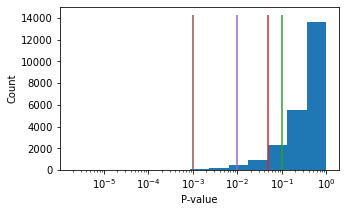

In [37]:
# Let's take a look at the distribution of these p-values.
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a histogram of pvalues on a log scale.
plt.figure(figsize=(5, 3))
ax = plt.subplot(111)
_, bins, _ = plt.hist(pvals.ravel(), bins=13, alpha=0)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(pvals.ravel(), bins=logbins, color='C0')
plt.vlines([0.1, 0.05, 0.01, 0.001], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], 
       colors=('C2', 'C3', 'C4', 'C5'),)
plt.xscale('log')
plt.xlabel('P-value')
plt.ylabel('Count')

It's clear that there aren't many P-values less than 0.001. Would any of these survive Bonferonni correction?

(Perhaps testing individual P-values across all timepoints, frequencies, and electrodes isn't the best approach. What if we restricted ourselves to running tests at the electrode level, for a given time window of interest?)

In [38]:
# Load the raw power values so we can run some tests.
rec = np.load(os.path.join('sample_files', 'R1001P_recalled.npy'))
pows = np.load(os.path.join('sample_files', 'R1001P_pows.npy'))

# pows are dimensions [freqs, events, electrodes, time bins].

# Let's average powers into across the 400-700 ms window.
# This begins after ERP effects die out,
# but not so long as to include irrelevant activity.
# Furthermore, let's only analyze the theta frequencies,
# which were the first 5 (trust me).
avg_pow = np.mean(np.mean(pows[:5, :, :, 4:7], 0), -1)

# avg_pow should be an events X electrodes array. Excellent!
# Let's do our 2-sample T-test on these averaged values
from scipy.stats import ttest_ind
ts, ps = ttest_ind(avg_pow[rec==1, :], avg_pow[rec==0, :], axis=0, equal_var=False)

In [39]:
# If we did an uncorrected test, what would we find?
sig_elecs = ps<0.05

print(ps<0.05)

[False False False False False False  True  True False False False False
  True False  True False False  True  True False  True False False False
 False False False False False False False False False False False False
  True False False False  True False False False False False False False
 False False False False False False  True False False False False  True
  True False  True False False False False False False False False False]


In [40]:
# What about Bonferonni correction?

from mne.stats import bonferroni_correction

reject, pval_cor = bonferroni_correction(ps, 0.05)

print(reject)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


No electrodes survive Bonferroni correction! Is it too conservative? Remember that Bonferonni assume **no statistical dependency between tests.** What about FDR correction (Benjamini-Hochberg)?

In [41]:
from mne.stats import fdr_correction

reject, pval_cor = fdr_correction(ps, 0.05)  #by default, this implements Benjamini-Hochberg with a 0.05 threshold. 

print(reject)

[False False False False False False  True False False False False False
  True False  True False False False  True False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False]


A few electrodes are back! With this threshold, we would expect, on average, 5% of the significant tests to result in a Type I error. 

The significant electrodes should not be over-interpreted, since we used a less-conservative test. Some still might be false positives. But they may carry interesting signal, and combined with other information, these signals could teach us something about the brain. 

## Permutation testing

The statistical tests we have discussed so far are **parametric**, meaning that they rely on models of data established by a finite number of parameters. For instance, the t-test models our data as normal distributions, with fixed means and standard deviations. These tests are often powerful and extremely fast, but they do have their drawbacks: Namely, they rely on a number of assumptions about the underlying data, including their distributional forms and **independence**. Many parametric tests assume that datapoints or distributions are uncorrelated or unrelated to each other; if this isn't actually true, you can end up with a false positive!

There are several **nonparametric** tests that do not make assumptions about the distributional form of your data. Today, we're going to implement a general approach to nonparametric testing, called a **permutation test**. Permutation tests (also called randomization tests) make no assumptions about the data; instead, they literally create the null distribution against which to compare your test statistic, instead of modeling it based on parameters derived from your data. In fact, there are many ways in which the general idea of resampling statistics are applied throughout data science -- learning about permutation tests is a good way to get some initial exposure to these methods. 

How to do a permutation test: 

1. **Decide what you want to test**: Are you looking for the difference in means between two distributions? A difference in their variance? Whether the sum of one distribution is significantly greater than another? A permutation test can, in theory, handle anything you throw at it. 
2. **Compute your "true" statistic.** For whatever you decided in step (1), compute that number. It could be a difference score, a t-statistic, an F-statistic, or anything else. 
3. **Randomly shuffle your data.** For example, if you're testing something between two distributions, randomly swap data between those distributions, but <i>maintain the original size of the distributions</i>. Remember, a permnutation test is about keeping everything exactly the same, except for the data values themselves. 
4. For each random shuffle in step (3), **recompute your test statistic**. 
5. **Repeat steps 3-4 many times.** There's no strict rule on exactly how many times, and the more shuffles you do, the precise P-value you can get. But more shuffles means more compute time, and it may quickly become intractable. 10000 shuffles is common and a good rule-of-thumb, but typically you'll need at least several hundred. 
6. **Compare true statistic to null distribution.** Typically this takes the form of computing a p-value or a z-score.

**WARNING: ONLY SHUFFLE OVER THE DIMENSION THAT REPRESENTS YOUR VARIABLE OF INTEREST. DO NOT SHUFFLE ALL OF YOUR DATA -- PERMUTATION TESTS MUST PRESERVE THE ORIGINAL STRUCTURE OF THE DATA AS MUCH AS POSSIBLE.**

#### Example

Let's try this out on our power data from R1001P. Yesterday, we ran a 2-sample (or "independent") t-test to ask whether there was a significant difference in power between remembered and not-remembered conditions. But in doing so, we violated an assumption of the test: The two distributions are not actually independent! Recalled and not-recalled trials can occur right after one another, and EEG data is autocorrelated in time. While, in practice, this violation might not be a huge deal, it was technically inappropriate to use this test for statistical inference. A permutation test allows us to keep everything above-board. 

In [42]:
# Reload the raw power values and recalled array.
rec = np.load(os.path.join('sample_files', 'R1001P_recalled.npy'))
pows = np.load(os.path.join('sample_files', 'R1001P_pows.npy'))

# pows are dimensions [freqs, events, electrodes, time bins].

# Let's average powers into across the 400-700 ms window.
# This begins after ERP effects die out,
# but not so long as to include irrelevant activity.
# Furthermore, let's only analyze the theta frequencies,
# which were the first 5 (trust me).
avg_pow = np.mean(np.mean(pows[:5, :, :, 4:11], 0), -1)

# Step 1: We'd like to test the difference in mean theta power
# between rec and not-rec distributions.
# Step 2: Compute the true difference in means.

diff_mu = np.mean(avg_pow[rec==1, :], 0)-np.mean(avg_pow[rec==0, :], 0)

# Step 3, 4, 5: Randomly shuffle data between rec and not-rec groups,
# and recompute test statistic (x 1000)

# We need to know how many data points fall in each group.
num_rec = np.sum(rec)
# Vector of indices for later shuffling.
idx_vec = np.arange(len(rec))

# Note that this function shuffles in-place.
from numpy.random import shuffle

# Number of random shuffles.
numshuf = 10000
null_mus = []
# Iterating over shuffles.
for i in range(numshuf):
    shuffle(idx_vec)
    # Creating null groups of 'rec' and 'not-rec'.
    null_rec = idx_vec[:num_rec]
    null_nrec = idx_vec[num_rec:]
    diff_mu_null = np.mean(avg_pow[null_rec, :], 0)-np.mean(avg_pow[null_nrec, :], 0)  #recomputing the test statistic
    null_mus.append(diff_mu_null)   
null_mus = np.array(null_mus)

Text(0, 0.5, 'Count')

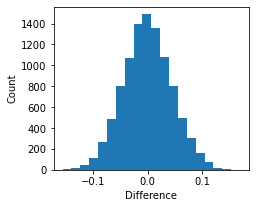

In [43]:
# Inspect the null distribution to see that everything worked as intended.
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(null_mus[:, 11], 20)
plt.xlabel('Difference')
plt.ylabel('Count')

Looks pretty good! Null distributions don't *have* to look any particular way, but if you see very strange-looking distributions, or an unreasonable range of values, you may want to go back and check your code. (Or at least understand why the distribution should look that way.)

One-sided: 0.21199999999999997
Two-sided: 0.42399999999999993
-0.79967046


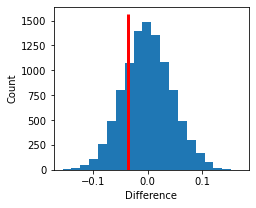

In [44]:
# Step 6: Get a p-value or z-score.

# Plot where the true value falls relative to the null distribution.
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(null_mus[:, 11], 20)
plt.xlabel('Difference')
plt.ylabel('Count')
plt.vlines([diff_mu[11]], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='r', linewidths=3)

# Quantify with a p-value.
# If we're doing a 2-sided test, multiply the resulting p-value by 2. 
pval = np.sum(null_mus[:, 11]>diff_mu[11])/float(null_mus.shape[0])
print('One-sided: '+str(1.-pval))
print('Two-sided: '+str((1.-pval)*2))

# Quantify with a z-score.
Z = (diff_mu[11]-np.mean(null_mus[:, 11]))/np.std(null_mus[:, 11])
print(Z)

The true value falls pretty close to the middle, which is why it has a nonsignificant p-value and a z-score of -0.744. Nothing significant here!

Text(0, 0.5, 'T-stat')

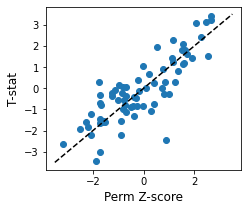

In [45]:
# How do the permutation results compare to our original t-test?
# An easy way to check would be to compare the permutation z-score to the t-statistics 
# (with large enough samples, these statistics are essentially the same).

# Compute z-score for each electrode.
zs = []
for i in range(len(diff_mu)):
    zs.append((diff_mu[i]-np.mean(null_mus[:, i]))/np.std(null_mus[:, i]))

# Plot results.
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.plot(zs, ts, 'o')
plt.plot([-3.5, 3.5], [-3.5, 3.5], 'k--')
plt.xlabel('Perm Z-score', fontsize=12)
plt.ylabel('T-stat', fontsize=12)

The t-stats and z-scores look very similar, meaning that the independence violation probably wasn't a big deal. There is a hint that the t-stats might have been slightly overstating our effects at the low end of the range. 

## Assignment 3: Event Related Potentials

In this assignment you will learn to carry out basic time-series analyses of electroencephalographic
(EEG) data. Specifically, you will measure event-related potentials (ERPs) associated with item
encoding events in a free recall experiment. For background on the ERP method please review
Chapter 3 of EHM, located in CMLWorkshop/materials.

You will be working with data from a single electrode 75 (Oz) from all subjects who have
data from experiment ltpFR2. You will analyze the time series of data surrounding each word
presentation, from -200 ms prior to word onset until 1,000 ms after word onset.

1. Plot the ERPs for recalled and not recalled items and add separate 95% confidence bands around each ERP. Do the confidence bands exclude zero at any points? Which ones? Are there points where they do not overlap? What hypothesis is being tested by these confidence intervals?
2. For each subject, compute the difference between the two ERPs and average the difference ERPs across subjects. Now compute the 95% confidence band around the difference waveform. Does this exclude zero at any points? Do these results match those from the previous analysis? If not, explain the difference in the inference one can make from these confidence bands.
3. Compute an across-subject paired t-test (scipy.stats.ttest_rel), comparing the voltage of recalled and not recalled items at each time point. Use a horizontal bar to indicate which time points exceed the criterion of p < 0.05 without correcting for multiple comparisons. How do these results match up with those in the previous two exercises?
4. Recompute the statistical significance of the difference between ERPs using the false-discovery rate method. Indicate the points with p < 0.05 using a bar of another color shifted above or below the first bar. Comment on the difference between the two methods. Which is more conservative and why?